In [1]:
import os#
#os.chdir('c:\\Users\\ma11115\\OneDrive - Imperial College London\\github_folder\\STK_SEARCH\\')
os.chdir("/rds/general/user/ma11115/home/STK_Search/STK_search")
from pathlib import Path#
import pandas as pd
import torch
import numpy as np
import importlib
from stk_search.utils import database_utils

os.makedirs('data/output/search_experiment/search_exp_database', exist_ok=True)

In [2]:
# run a search experiment with the new target
from stk_search.utils import run_hpc_utils
importlib.reload(run_hpc_utils)
df_total_path_bench = 'data/output/Full_dataset/30K_benchmark_150524.csv'
df_precursor_path ="data/output/Prescursor_data/precursor_data_200324.pkl"
df_precursor_Mordred_path="data/output/Prescursor_data/df_PCA_mordred_descriptor_290224.pkl"

search_space_loc = "data/input/EXP_search_space/6_mers_filtered_BB_2024_05_15_09_28_21//search_space_0.pkl"#"data/input/EXP_search_space/6_frag_all_2024_05_11_22_40_37//search_space_0.pkl"

In [3]:
# load and check the search space
from stk_search import Search_space
search_space = pd.read_pickle(search_space_loc)
print(' Search space condition list:', search_space.conditions_list)
print('shape of df_precursors:', search_space.df_precursors.shape)
print('search space syntax:', search_space.syntax)


 Search space condition list: [[], [], [], [], [], []]
shape of df_precursors: (274, 49)
search space syntax: [0, 1, 2, 3, 4, 5]


In [4]:
# load and check the dataframe to search over and the df_precursors
df_Benchmark , df_precursors= database_utils.load_data_from_file(df_total_path_bench, df_precursor_path,add_feature_frag=True)
df_precursor_Mordred = pd.read_pickle(df_precursor_Mordred_path)
print('shape of df_Benchmark:', df_Benchmark.shape)
print('shape of df_precursors:', df_precursors.shape)
print('shape of df_precursor_Mordred:', df_precursor_Mordred.shape)
print(df_Benchmark[df_Benchmark['target']>0].shape[0]/df_Benchmark.shape[0])

shape of df_Benchmark: (30000, 207)
shape of df_precursors: (306, 40)
shape of df_precursor_Mordred: (312, 101)
0.0111


In [5]:
num_of_elem_in_SP = search_space.check_df_for_element_from_SP(df_Benchmark).shape
print('number of elements in the benchmark in the search space:', num_of_elem_in_SP)

number of elements in the benchmark in the search space: (30000, 207)


In [6]:
# set the benchmark parameters  
exp_name = "Benchmark_56K_dataset"
num_elem_initialisation=50
num_iteration=500
target = 'target'
aim = 'maximise'
case_name_list = ["ea_surrogate_new", "BO_learned_new"] # ['evolution_algorithm','random','BO_precursor']#,["ea_surrogate_new", "BO_learned_new"] # "ea_surrogate", "BO_learned"
config_dir_list = ["/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240322/SchNet/splitrand-nummol50000"]
config_dir_list_new = ["/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240412/SchNet/splitrand-nummol68864"]
#config_dir_list_new = ["/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516//SchNet/splitrand-nummol20000/"]
config_dir_list_new = [f"/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol{num_mol}" for num_mol in [10000,20000]]

In [7]:
# check the representation generated using the learned representation ( using a gnn for each fragment)
config_dir = config_dir_list[0]
from src.dev_scripts.run_search_new import load_representation_BO_graph_frag
representation = load_representation_BO_graph_frag(config_dir,df_total_path_bench)
representation.generate_repr(df_Benchmark[[f'InChIKey_{i}' for i in range(6)]].loc[0:100,:])

config loaded from /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240322/SchNet/splitrand-nummol50000
/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240322//SchNet/splitrand-nummol50000//transformer/epoch=43-val_loss=0.42-other_metric=0.00.ckpt
no dataset found
Model loaded:  /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240322/SchNet/splitrand-nummol50000/epoch=18-val_loss=0.21-other_metric=0.00.ckpt
lr 0.0005
loading model from checkpoint /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240322//SchNet/splitrand-nummol50000//transformer/epoch=43-val_loss=0.42-other_metric=0.00.ckpt


tensor([[-0.2190, -0.8119, -0.2114,  ...,  1.2795, -1.1144, -0.6874],
        [-0.3359, -0.7804, -0.1105,  ...,  1.2327, -1.1164, -0.6467],
        [-0.2828, -0.6610, -0.1364,  ...,  0.9725, -0.9670, -0.6088],
        ...,
        [ 0.2659,  0.0685, -0.2045,  ...,  0.4034, -1.1325,  0.4292],
        [-0.7570, -0.6297,  0.0800,  ...,  0.9786, -1.2912, -0.7561],
        [ 0.2412,  0.1611, -0.3039,  ...,  0.2308, -0.8912,  0.3342]])

In [8]:
# check the representation generated using the learned representation building the polymer from fragment for 
config_dir = config_dir_list_new[1]
from src.dev_scripts.run_search_new import load_representation_model
representation, pymodel = load_representation_model(config_dir)
representation.generate_repr(df_Benchmark[[f'InChIKey_{i}' for i in range(6)]].loc[0:100,:])

config loaded from /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol20000
Model loaded:  SchNet


Pandas Apply:   0%|          | 0/101 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/101 [00:00<?, ?it/s]

tensor([[ 0.1137,  0.3956,  0.6397,  ..., -0.5438, -0.0814, -0.3486],
        [ 0.1293,  0.4832,  0.6539,  ..., -0.5233, -0.0601, -0.4207],
        [ 0.1234,  0.4112,  0.6220,  ..., -0.5335, -0.0659, -0.3519],
        ...,
        [ 0.0936,  0.1928,  0.4585,  ..., -0.5231, -0.0470, -0.3513],
        [ 0.1631,  0.4564,  0.5701,  ..., -0.5862,  0.0118, -0.4835],
        [ 0.1145,  0.2365,  0.5012,  ..., -0.5863, -0.0339, -0.4775]])

In [9]:
importlib.reload(run_hpc_utils)

def run_search_on_hpc(
    case_name="ea_surrogate",
    df_path_total=df_total_path_bench,
    df_precursors_path=df_precursor_path,
    frag_properties="selected",
    config_dir="",
    dataset_representation_path = None,
    test=False,
    lim_counter = 5,
    which_acquisition = "EI",

):
    string_to_run_notebook, script_qsub = run_hpc_utils.generate_string_run(
        case=case_name,
        target=target,
        aim=aim,
        num_elem_initialisation=num_elem_initialisation,
        num_iteration=num_iteration,
        df_path=df_path_total,
        benchmark=True,
        test_name=exp_name,
        df_precursors_path=df_precursors_path,
        frag_properties=frag_properties,
        config_dir=config_dir,
        dataset_representation_path=dataset_representation_path,
        lim_counter = lim_counter,
        which_acquisition = which_acquisition,
        search_space_loc = search_space_loc,
    )
    if test:
        %run {string_to_run_notebook}
        return string_to_run_notebook
    run_hpc_utils.submit_job(script_qsub, case_name)




In [71]:
importlib.reload(BayesianOptimisation_ErrPred)
importlib.reload(BayesianOptimisation)


run_search_on_hpc(
                case_name="BayesianOptimisation_ErrPred",
                df_precursors_path=df_precursor_Mordred_path,
                frag_properties="all",
                which_acquisition = "EI_GNN",
                config_dir = config_dir_list_new[1],
                test=True
        )

src/dev_scripts/run_search_new.py  --case BayesianOptimisation_ErrPred --test_name Benchmark_56K_dataset --target target --aim maximise --benchmark 1 --num_iteration 500 --num_elem_initialisation 50 --which_acquisition EI_GNN --dataset_representation_path None --df_path data/output/Full_dataset/30K_benchmark_150524.csv --df_precursors_path data/output/Prescursor_data/df_PCA_mordred_descriptor_290224.pkl --config_dir /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol20000 --search_space_loc /rds/general/user/ma11115/home/STK_Search/STK_search/data/input/search_space/test/search_space1.pkl --frag_properties all --lim_counter 5 --budget None
 number of fragment 6
True benchmark
BayesianOptimisation_ErrPred   case  
config loaded from /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol20000
Model loaded:  SchNet
Inputs saved.
element Inchike

Pandas Apply:   0%|          | 0/50 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/50 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/76 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/26 [00:00<?, ?it/s]

size of representation dataset  76


Pandas Apply:   0%|          | 0/94 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/18 [00:00<?, ?it/s]

when merged df_elements size is  (170, 7)
df_elements size is  (94, 7)


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/74 [00:00<?, ?it/s]

when merged df_elements size is  (262, 7)
df_elements size is  (168, 7)


Pandas Apply:   0%|          | 0/182 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14 [00:00<?, ?it/s]

when merged df_elements size is  (350, 7)
df_elements size is  (182, 7)


Pandas Apply:   0%|          | 0/202 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

when merged df_elements size is  (384, 7)
df_elements size is  (202, 7)


Pandas Apply:   0%|          | 0/255 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/53 [00:00<?, ?it/s]

when merged df_elements size is  (457, 7)
df_elements size is  (255, 7)
element Inchikey suggested: DMGLQFJIMOYFLY-UHFFFAOYSA-N, Eval: -2.30674891026957
iteration 0 completed
max fitness acquired: 0.3785799820136856
min fitness acquired: -4.597227494896695
new fitness acquired: -2.30674891026957


Pandas Apply:   0%|          | 0/51 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/79 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  261


Pandas Apply:   0%|          | 0/164 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/83 [00:00<?, ?it/s]

when merged df_elements size is  (243, 7)
df_elements size is  (164, 7)


Pandas Apply:   0%|          | 0/230 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/65 [00:00<?, ?it/s]

when merged df_elements size is  (394, 7)
df_elements size is  (230, 7)


Pandas Apply:   0%|          | 0/245 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14 [00:00<?, ?it/s]

when merged df_elements size is  (475, 7)
df_elements size is  (245, 7)


Pandas Apply:   0%|          | 0/247 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

when merged df_elements size is  (492, 7)
df_elements size is  (247, 7)


Pandas Apply:   0%|          | 0/258 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

when merged df_elements size is  (505, 7)
df_elements size is  (258, 7)
element Inchikey suggested: QNDVCLUEQVXEMT-BWVPEESFSA-N, Eval: -2.448384647845592
iteration 1 completed
max fitness acquired: 0.3785799820136856
min fitness acquired: -4.597227494896695
new fitness acquired: -2.448384647845592


Pandas Apply:   0%|          | 0/52 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/78 [00:00<?, ?it/s]

size of representation dataset  436


Pandas Apply:   0%|          | 0/287 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/199 [00:00<?, ?it/s]

when merged df_elements size is  (365, 7)
df_elements size is  (287, 7)


Pandas Apply:   0%|          | 0/319 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30 [00:00<?, ?it/s]

when merged df_elements size is  (606, 7)
df_elements size is  (319, 7)


Pandas Apply:   0%|          | 0/336 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/17 [00:00<?, ?it/s]

when merged df_elements size is  (655, 7)
df_elements size is  (336, 7)


Pandas Apply:   0%|          | 0/418 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/41 [00:00<?, ?it/s]

when merged df_elements size is  (754, 7)
df_elements size is  (418, 7)


Pandas Apply:   0%|          | 0/523 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/102 [00:00<?, ?it/s]

when merged df_elements size is  (941, 7)
df_elements size is  (523, 7)
element Inchikey suggested: AHFPYKIHYZIWAM-NNODZFFKSA-N, Eval: -1.5299408073760032
iteration 2 completed
max fitness acquired: 0.3785799820136856
min fitness acquired: -4.597227494896695
new fitness acquired: -1.5299408073760032


Pandas Apply:   0%|          | 0/53 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/83 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

size of representation dataset  836


Pandas Apply:   0%|          | 0/118 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

when merged df_elements size is  (201, 7)
df_elements size is  (118, 7)


Pandas Apply:   0%|          | 0/128 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

when merged df_elements size is  (246, 7)
df_elements size is  (128, 7)


Pandas Apply:   0%|          | 0/181 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

when merged df_elements size is  (309, 7)
df_elements size is  (181, 7)


Pandas Apply:   0%|          | 0/286 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

when merged df_elements size is  (467, 7)
df_elements size is  (286, 7)


Pandas Apply:   0%|          | 0/318 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/25 [00:00<?, ?it/s]

when merged df_elements size is  (604, 7)
df_elements size is  (318, 7)
element Inchikey suggested: LEJIXGNNVCSAMA-VRHVFUOLSA-N, Eval: -0.7509574463971284
iteration 3 completed
max fitness acquired: 0.3785799820136856
min fitness acquired: -4.597227494896695
new fitness acquired: -0.7509574463971284


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/84 [00:00<?, ?it/s]

size of representation dataset  888


Pandas Apply:   0%|          | 0/213 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/37 [00:00<?, ?it/s]

when merged df_elements size is  (297, 7)
df_elements size is  (213, 7)


Pandas Apply:   0%|          | 0/237 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/23 [00:00<?, ?it/s]

when merged df_elements size is  (450, 7)
df_elements size is  (237, 7)


Pandas Apply:   0%|          | 0/258 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

when merged df_elements size is  (495, 7)
df_elements size is  (258, 7)


Pandas Apply:   0%|          | 0/292 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/29 [00:00<?, ?it/s]

when merged df_elements size is  (550, 7)
df_elements size is  (292, 7)


Pandas Apply:   0%|          | 0/311 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/19 [00:00<?, ?it/s]

when merged df_elements size is  (603, 7)
df_elements size is  (311, 7)
element Inchikey suggested: LUBYXOUNURODGA-UHFFFAOYSA-N, Eval: -1.2529095957906018
iteration 4 completed
max fitness acquired: 0.3785799820136856
min fitness acquired: -4.597227494896695
new fitness acquired: -1.2529095957906018


Pandas Apply:   0%|          | 0/55 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

size of representation dataset  1016


Pandas Apply:   0%|          | 0/146 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

when merged df_elements size is  (250, 7)
df_elements size is  (146, 7)


Pandas Apply:   0%|          | 0/163 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

when merged df_elements size is  (309, 7)
df_elements size is  (163, 7)


Pandas Apply:   0%|          | 0/227 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14 [00:00<?, ?it/s]

when merged df_elements size is  (390, 7)
df_elements size is  (227, 7)


Pandas Apply:   0%|          | 0/245 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15 [00:00<?, ?it/s]

when merged df_elements size is  (472, 7)
df_elements size is  (245, 7)


Pandas Apply:   0%|          | 0/324 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/74 [00:00<?, ?it/s]

when merged df_elements size is  (569, 7)
df_elements size is  (324, 7)
element Inchikey suggested: PEVOHSJTXAMZII-SECZBPCUSA-N, Eval: -1.4195476846449264
iteration 5 completed
max fitness acquired: 0.3785799820136856
min fitness acquired: -4.597227494896695
new fitness acquired: -1.4195476846449264


Pandas Apply:   0%|          | 0/56 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/82 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  1134


Pandas Apply:   0%|          | 0/157 [00:00<?, ?it/s]

when merged df_elements size is  (239, 7)
df_elements size is  (157, 7)


Pandas Apply:   0%|          | 0/177 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

when merged df_elements size is  (334, 7)
df_elements size is  (177, 7)


Pandas Apply:   0%|          | 0/218 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/27 [00:00<?, ?it/s]

when merged df_elements size is  (395, 7)
df_elements size is  (218, 7)


Pandas Apply:   0%|          | 0/415 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

when merged df_elements size is  (633, 7)
df_elements size is  (415, 7)


Pandas Apply:   0%|          | 0/431 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14 [00:00<?, ?it/s]

when merged df_elements size is  (846, 7)
df_elements size is  (431, 7)
element Inchikey suggested: FYSODRRKVQIPRW-UHFFFAOYSA-N, Eval: -1.7424835798558682
iteration 6 completed
max fitness acquired: 0.3785799820136856
min fitness acquired: -4.597227494896695
new fitness acquired: -1.7424835798558682


Pandas Apply:   0%|          | 0/57 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/87 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

size of representation dataset  1201


Pandas Apply:   0%|          | 0/97 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

when merged df_elements size is  (184, 7)
df_elements size is  (97, 7)


Pandas Apply:   0%|          | 0/131 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/21 [00:00<?, ?it/s]

when merged df_elements size is  (228, 7)
df_elements size is  (131, 7)


Pandas Apply:   0%|          | 0/222 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/12 [00:00<?, ?it/s]

when merged df_elements size is  (353, 7)
df_elements size is  (222, 7)


Pandas Apply:   0%|          | 0/247 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/22 [00:00<?, ?it/s]

when merged df_elements size is  (469, 7)
df_elements size is  (247, 7)


Pandas Apply:   0%|          | 0/385 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

KeyboardInterrupt: 

'src/dev_scripts/run_search_new.py  --case BayesianOptimisation_ErrPred --test_name Benchmark_56K_dataset --target target --aim maximise --benchmark 1 --num_iteration 500 --num_elem_initialisation 50 --which_acquisition EI_GNN --dataset_representation_path None --df_path data/output/Full_dataset/30K_benchmark_150524.csv --df_precursors_path data/output/Prescursor_data/df_PCA_mordred_descriptor_290224.pkl --config_dir /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol20000 --search_space_loc /rds/general/user/ma11115/home/STK_Search/STK_search/data/input/search_space/test/search_space1.pkl --frag_properties all --lim_counter 5 --budget None'

In [56]:
!qstat


Job id            Name             User              Time Use S Queue
----------------  ---------------- ----------------  -------- - -----
9515697.pbs       jupyterhub       ma11115           00:02:25 R pqjupyter       
9515891[].pbs     Runsearch_Bayes  ma11115                  0 B v1_short8a      


In [16]:
for case_name in case_name_list:
    if case_name == 'ea_surrogate' or case_name == "BO_learned":
        for config_dir in config_dir_list:
            run_search_on_hpc(
                case_name=case_name,
                df_precursors_path=df_precursor_path,
                frag_properties="selected",
                config_dir = config_dir,
            )
    elif case_name == 'ea_surrogate_new' or case_name == "BO_learned_new":
        for config_dir in config_dir_list_new:
            run_search_on_hpc(
                case_name=case_name,
                df_precursors_path=df_precursor_path,
                frag_properties="selected",
                config_dir = config_dir,
            )
    else:
        run_search_on_hpc(
            case_name=case_name,
            df_precursors_path=df_precursor_path,
            frag_properties="selected",
        )
        if case_name =='BO_precursor':
            run_search_on_hpc(
                case_name=case_name,
                df_precursors_path=df_precursor_Mordred_path,
                frag_properties="all",
        )

src/dev_scripts/run_search_new.py  --case ea_surrogate_new --test_name Benchmark_56K_dataset --target target --aim maximise --benchmark 1 --num_iteration 500 --num_elem_initialisation 50 --which_acquisition EI --dataset_representation_path None --df_path data/output/Full_dataset/30K_benchmark_150524.csv --df_precursors_path data/output/Prescursor_data/precursor_data_200324.pkl --config_dir /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol10000 --search_space_loc /rds/general/user/ma11115/home/STK_Search/STK_search/data/input/search_space/test/search_space1.pkl --frag_properties selected --lim_counter 5
9493721[].pbs
src/dev_scripts/run_search_new.py  --case BO_learned_new --test_name Benchmark_56K_dataset --target target --aim maximise --benchmark 1 --num_iteration 500 --num_elem_initialisation 50 --which_acquisition EI --dataset_representation_path None --df_path data/output/Full_dataset/30K_benchmark_150524.

NameError: name 'run_search_on_hpc' is not defined

# load results and plot some metrics

In [57]:

import glob
import pickle
import json
def load_search_list(df):
    search_list = []
    for index, row in df.iterrows():
        search_list.append(pickle.load(open(row['search_exp_file'], "rb")))
    return search_list
save_path = f"data/output/search_experiment/search_exp_database"
json_files = glob.glob(f"{save_path}/*.json")
list_json = []
for json_file in json_files:
    with open(json_file, 'r') as f:
        list_json.append(json.load(f))
    f.close()
df = pd.DataFrame(list_json)
df['search_exp_file'] = df['search_output_folder']+"/"+df['date']+"/results_"+df['run_search_name']+'.pkl'
df = df[df['benchmark']]
print(df.shape)
df_all = df.copy()
df_all.head()


(2897, 22)


num_iteration  num_elem_initialisation                          test_name  \
1            500                       50              Benchmark_56K_dataset   
2            300                       50                         new_target   
3            300                       50                          frag_prop   
4            500                       50              Benchmark_75K_dataset   
5            300                       50  different_representations_dataset   

               case target_name  \
1      BO_precursor      target   
2      ea_surrogate      target   
3      BO_precursor      target   
4  ea_surrogate_new      target   
5      ea_surrogate      target   

                                          config_dir       aim  \
1                                                     maximise   
2  /rds/general/user/ma11115/home/STK_Search/STK_...      None   
3  /rds/general/user/ma11115/home/STK_Search/STK_...       0.0   
4  /rds/general/user/ma11115/home/STK_Search/STK_...  maximise   
5  /rds/general/user/ma11115/home/STK_Search/STK_...      None   

  which_acquisition  lim_counter  \
1                EI            5   
2                EI           10   
3                EI           10   
4                EI            5   
5                EI           10   

                                    search_space_loc  ...  \
1  /rds/general/user/ma11115/home/STK_Search/STK_...  ...   
2  /rds/general/user/ma11115/home/STK_Search/STK_...  ...   
3  /rds/general/user/ma11115/home/STK_Search/STK_...  ...   
4  /rds/general/user/ma11115/home/STK_Search/STK_...  ...   
5  /rds/general/user/ma11115/home/STK_Search/STK_...  ...   

                                  df_precursors_path benchmark  \
1  data/output/Prescursor_data/precursor_data_200...      True   
2  data/output/Prescursor_data/calculation_data_p...      True   
3  /rds/general/user/ma11115/home/STK_Search/STK_...      True   
4  data/output/Prescursor_data/precursor_data_200...      True   
5  data/output/Prescursor_data/calculation_data_p...      True   

                         dataset_representation_path  frag_properties  \
1                                               None         selected   
2  /rds/general/ephemeral/user/ma11115/ephemeral/...              all   
3  /rds/general/user/ma11115/home/STK_Search/STK_...              all   
4                                               None         selected   
5  /rds/general/ephemeral/user/ma11115/ephemeral/...              all   

                    run_search_name  \
1  a7ebd9293ec84c7c8e118bfb8b1c234e   
2  ac97e57ea5cf4449a242bc02251a0e62   
3  ddb27e04633545739bbfadba54b279e3   
4  29aa2aea54e243ac9ca7f0a302160199   
5  cf384899f2ed49d298302d960a2352c7   

                                search_output_folder      date  \
1  data/output/search_experiment/6_frag/Benchmark...  20240516   
2    data/output/search_experiment/6_frag/new_target  20240323   
3     data/output/search_experiment/6_frag/frag_prop  20240308   
4  data/output/search_experiment/6_frag/Benchmark...  20240512   
5  data/output/search_experiment/6_frag/different...  20240322   

                                git_version budget  \
1  e5c60ca4e136ee47e25bbaa7e455f565895b70c3    NaN   
2  e5c60ca4e136ee47e25bbaa7e455f565895b70c3    NaN   
3  e5c60ca4e136ee47e25bbaa7e455f565895b70c3    NaN   
4  e5c60ca4e136ee47e25bbaa7e455f565895b70c3    NaN   
5  e5c60ca4e136ee47e25bbaa7e455f565895b70c3    NaN   

                                     search_exp_file  
1  data/output/search_experiment/6_frag/Benchmark...  
2  data/output/search_experiment/6_frag/new_targe...  
3  data/output/search_experiment/6_frag/frag_prop...  
4  data/output/search_experiment/6_frag/Benchmark...  
5  data/output/search_experiment/6_frag/different...  

[5 rows x 22 columns]

In [58]:
num_iteration = 500
num_elem_initialisation = 50
oligomer_size = 6 
search_space_loc = '/rds/general/user/ma11115/home/STK_Search/STK_search/data/input/search_space/test/search_space1.pkl'
#df_filtered = df_all[df_all['num_iteration']==num_iteration]
#df_filtered = df_filtered[df_filtered['num_elem_initialisation']==num_elem_initialisation]
df_filtered = df_all[df_all['df_path']==df_total_path_bench]

df_filtered = df_filtered[df_filtered['oligomer_size']==oligomer_size]
print(df_filtered.shape)

print(df_filtered.shape)
df_list = df_filtered.groupby(['case','frag_properties','which_acquisition','config_dir','df_path','df_precursors_path',])
print(len(df_list))
df_list.describe()

(724, 22)
(724, 22)
14


num_iteration  \
                                                                                                                                                                                                                               count   
case                         frag_properties which_acquisition config_dir                                         df_path                                           df_precursors_path                                                 
BO_learned_new               selected        EI                /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
                                                               /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
                                             UCB               /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
                                             max_sigma         /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          51.0   
                                             max_y_hat         /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
BO_precursor                 all             EI                                                                   data/output/Full_dataset/30K_benchmark_150524.csv /rds/general/user/ma11115/home/STK_Search/STK_s...          50.0   
                                                                                                                                                                    data/output/Prescursor_data/df_PCA_mordred_desc...          50.0   
                             selected        EI                                                                   data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
BayesianOptimisation_ErrPred all             EI_GNN            /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/df_PCA_mordred_desc...          72.0   
                                             UCB_GNN           /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/df_PCA_mordred_desc...          51.0   
ea_surrogate_new             selected        EI                /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
                                                               /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
evolution_algorithm          selected        EI                                                                   data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
random                       selected        EI                                                                   data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   

                                                                                                                                                                                                                               \
                                             

In [62]:
import pandas as pd
def join_name(x):
    return '*'.join(x)

def load_search_list(df,min_num_iteration):
    search_list = []
    for index, row in df.iterrows():
        if min_num_iteration <= row['max_num_eval']:
            search_list.append(pd.read_pickle(row['search_exp_file']))
    return search_list
def get_results_length(x):
    try:
        return len(pd.read_pickle(x)['fitness_acquired'])
    except Exception as e:
        #print(e)
        return 0
results_dict = {}
num_searches_with_min, df_plot_dict = {}, {}
min_num_iteration = 500
for name , df in df_list:
    if len(df) != 0: 
        df['max_num_eval']=df['search_exp_file'].apply(lambda x: get_results_length(x))
        key = join_name(name)
        df['key'] = key
        if df['max_num_eval'].max() >= min_num_iteration:
            results_dict[key] = load_search_list(df,min_num_iteration)
            num_searches_with_min[key] = (len(results_dict[key]), df['df_path'].values[0])
df_summary_1 = pd.DataFrame.from_dict(num_searches_with_min, orient='index',columns=['number of explorations with min iterations','df_path'])
df_summary_1['key'] = df_summary_1.index    
df_summary_1['case'] = df_summary_1['key'].apply(lambda x: x.split('*')[0])
df_summary_1['num_mol_training'] = df_summary_1['key'].apply(lambda x: x.split('nummol')[-1])

df_summary_1['which_acquisition'] = df_summary_1['key'].apply(lambda x: x.split('*')[2])
df_summary_1.reset_index(inplace=True)
df_summary_1

index  \
0   BO_learned_new*selected*EI*/rds/general/user/m...   
1   BO_learned_new*selected*EI*/rds/general/user/m...   
2   BO_learned_new*selected*UCB*/rds/general/user/...   
3   BO_learned_new*selected*max_sigma*/rds/general...   
4   BO_learned_new*selected*max_y_hat*/rds/general...   
5   BO_precursor*all*EI**data/output/Full_dataset/...   
6   BO_precursor*selected*EI**data/output/Full_dat...   
7   BayesianOptimisation_ErrPred*all*EI_GNN*/rds/g...   
8   BayesianOptimisation_ErrPred*all*UCB_GNN*/rds/...   
9   ea_surrogate_new*selected*EI*/rds/general/user...   
10  ea_surrogate_new*selected*EI*/rds/general/user...   
11  evolution_algorithm*selected*EI**data/output/F...   
12  random*selected*EI**data/output/Full_dataset/3...   

    number of explorations with min iterations  \
0                                           44   
1                                           50   
2                                           50   
3                                           50   
4                                           50   
5                                           38   
6                                           41   
7                                           44   
8                                           50   
9                                           25   
10                                          23   
11                                          24   
12                                          50   

                                              df_path  \
0   data/output/Full_dataset/30K_benchmark_150524.csv   
1   data/output/Full_dataset/30K_benchmark_150524.csv   
2   data/output/Full_dataset/30K_benchmark_150524.csv   
3   data/output/Full_dataset/30K_benchmark_150524.csv   
4   data/output/Full_dataset/30K_benchmark_150524.csv   
5   data/output/Full_dataset/30K_benchmark_150524.csv   
6   data/output/Full_dataset/30K_benchmark_150524.csv   
7   data/output/Full_dataset/30K_benchmark_150524.csv   
8   data/output/Full_dataset/30K_benchmark_150524.csv   
9   data/output/Full_dataset/30K_benchmark_150524.csv   
10  data/output/Full_dataset/30K_benchmark_150524.csv   
11  data/output/Full_dataset/30K_benchmark_150524.csv   
12  data/output/Full_dataset/30K_benchmark_150524.csv   

                                                  key  \
0   BO_learned_new*selected*EI*/rds/general/user/m...   
1   BO_learned_new*selected*EI*/rds/general/user/m...   
2   BO_learned_new*selected*UCB*/rds/general/user/...   
3   BO_learned_new*selected*max_sigma*/rds/general...   
4   BO_learned_new*selected*max_y_hat*/rds/general...   
5   BO_precursor*all*EI**data/output/Full_dataset/...   
6   BO_precursor*selected*EI**data/output/Full_dat...   
7   BayesianOptimisation_ErrPred*all*EI_GNN*/rds/g...   
8   BayesianOptimisation_ErrPred*all*UCB_GNN*/rds/...   
9   ea_surrogate_new*selected*EI*/rds/general/user...   
10  ea_surrogate_new*selected*EI*/rds/general/user...   
11  evolution_algorithm*selected*EI**data/output/F...   
12  random*selected*EI**data/output/Full_dataset/3...   

                            case  \
0                 BO_learned_new   
1                 BO_learned_new   
2                 BO_learned_new   
3                 BO_learned_new   
4                 BO_learned_new   
5                   BO_precursor   
6                   BO_precursor   
7   BayesianOptimisation_ErrPred   
8   BayesianOptimisation_ErrPred   
9               ea_surrogate_new   
10              ea_surrogate_new   
11           evolution_algorithm   
12                        random   

                                     num_mol_training which_acquisition  
0   20000/*data/output/Full_dataset/30K_benchmark_...                EI  
1   10000*data/output/Full_dataset/30K_benchmark_1...                EI  
2   20000/*data/output/Full_dataset/30K_benchmark_...               UCB  
3   20000/*data/output/Full_dataset/30K_benchmark_...         max_sigma  
4   20000/*data/output/Full_dataset/30K_benchmark_...         max_y_hat  
5

In [63]:
import datetime
import pickle
from stk_search.utils import Search_results_plot
from stk_search.utils import plot_results_all
import importlib
importlib.reload(Search_results_plot)
importlib.reload(plot_results_all)
save_folder = '/rds/general/user/ma11115/home/STK_Search/STK_search/data/figures/'+datetime.datetime.now().strftime("_%Y_%m_%d")
plot_function_list_single = [Search_results_plot.plot_simple_regret,Search_results_plot.plot_cumulative_regret,
                      Search_results_plot.plot_number_of_molecule_discovered,Search_results_plot.plot_rate_of_discovery,]
plot_function_list_multi = [Search_results_plot.plot_all_y_max,Search_results_plot.plot_number_of_molecule_discovered_sum,Search_results_plot.plot_total_rate_of_discovery, ]

 keys : 0     BO_learned_new*selected*EI*/rds/general/user/m...
7     BayesianOptimisation_ErrPred*all*EI_GNN*/rds/g...
8     BayesianOptimisation_ErrPred*all*UCB_GNN*/rds/...
9     ea_surrogate_new*selected*EI*/rds/general/user...
11    evolution_algorithm*selected*EI**data/output/F...
Name: key, dtype: object


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


len of mol_dataset 60401


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


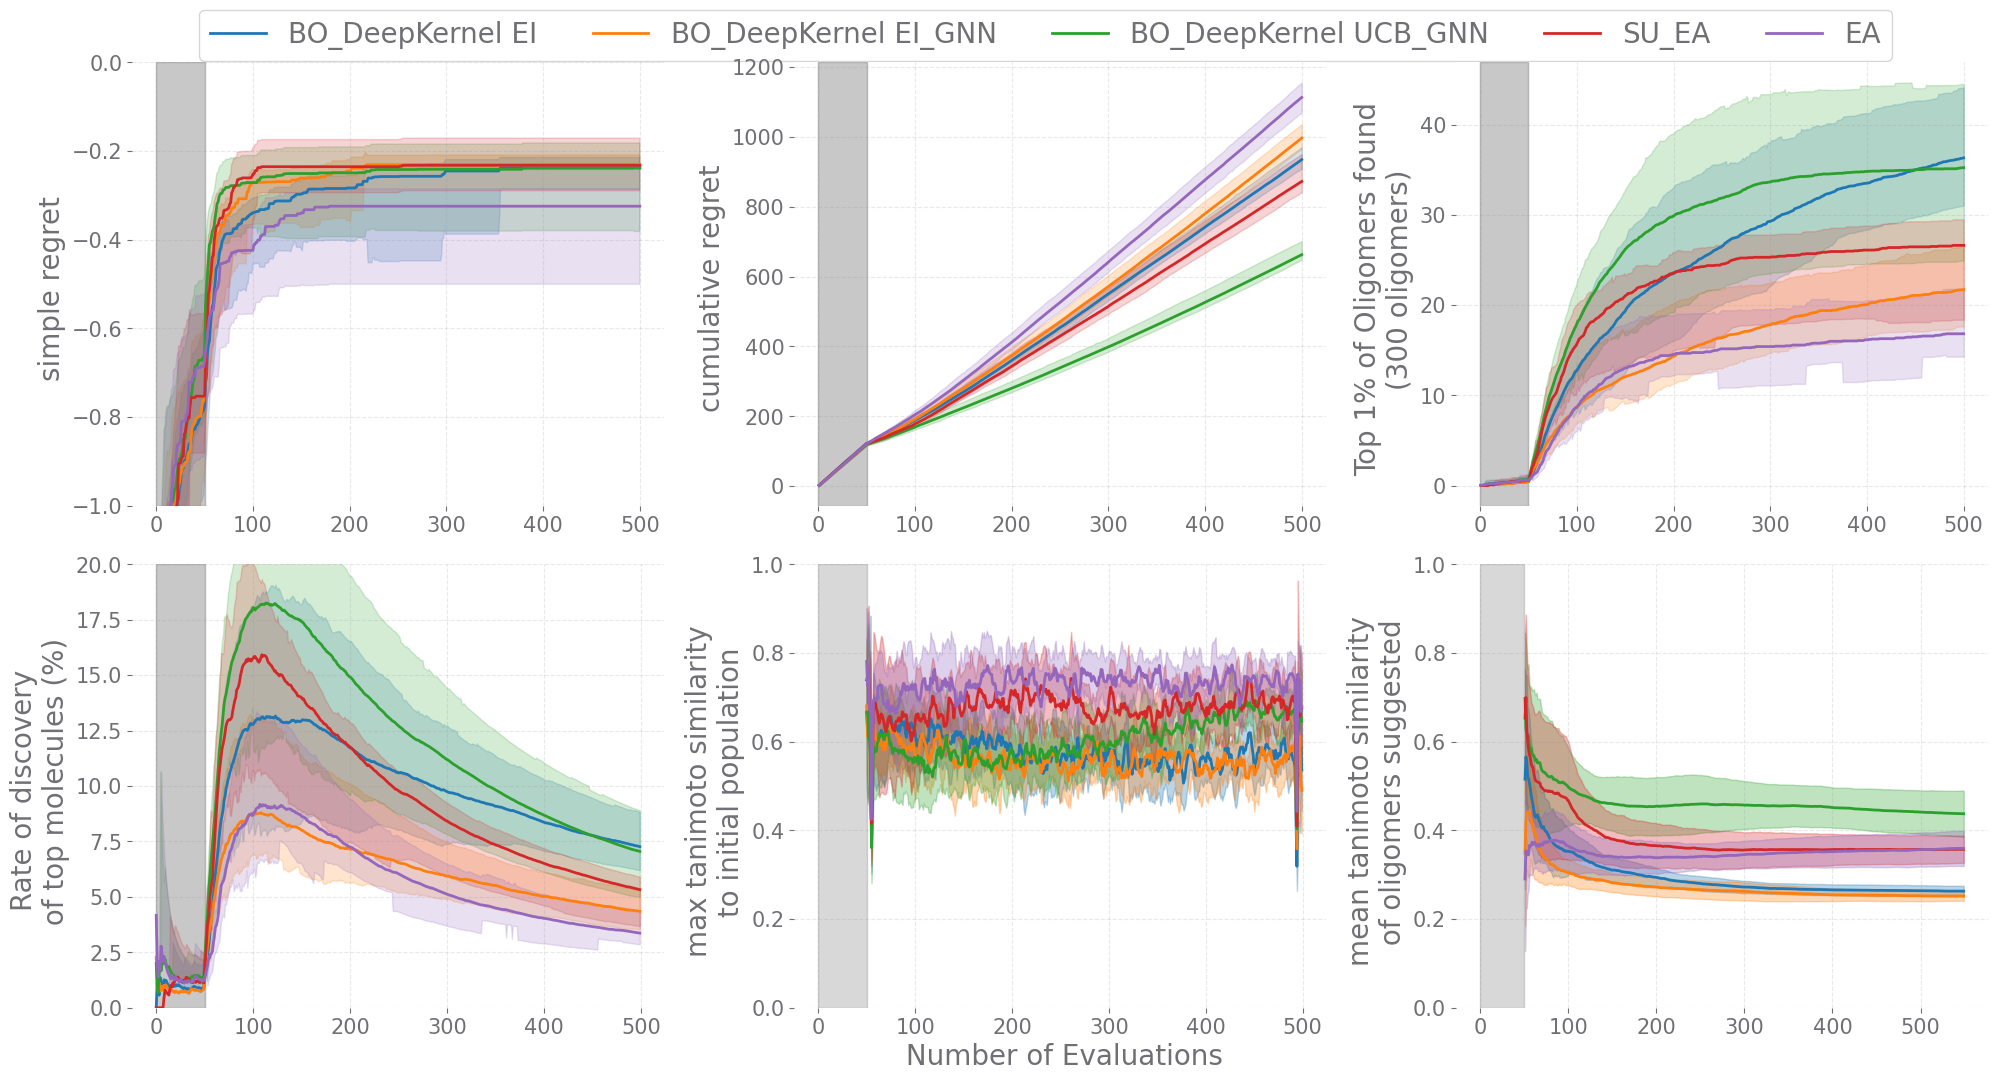

In [64]:
importlib.reload(plot_results_all.tanimoto_similarity_utils)
df_mol_dict = plot_results_all.load_mol_dict()
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot.iloc[[0,7,8,9,11]]
legend_list = ['BO_DeepKernel EI', 'BO_DeepKernel EI_GNN', 'BO_DeepKernel UCB_GNN','SU_EA','EA']#'BO_DK','BO_DK new','SU EA','SU_EA New'


fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_single,results_dict,df_list,nb_iterations=min_num_iteration)
df_mol_dict = plot_results_all.add_similarity_plots(axes,df_plot,df_mol_dict,results_dict, nb_iterations=min_num_iteration,  nb_initialisation=50)
plot_results_all.save_mol_dict(df_mol_dict)
for ax_ in axes:
    ax_.set_xlabel('')

# update the axes geometry information
from matplotlib import gridspec
gs = gridspec.GridSpec(len(fig.axes), 3)
fig.set_size_inches(20, 30)
for i, ax in enumerate(fig.axes):
    ax.set_subplotspec(gs[i])
# set font size
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
# hide legend
axes[0].legend().set_visible(False)
fig.tight_layout()
lg = axes[0].legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=6,fontsize=20)
for i in range(len(legend_list)):
    lg.texts[i].set_text(legend_list[i])

axes[0].set_ylim(-1,0)
axes[3].set_ylim(0,20)
# rename x ticks
axes[4].axvspan(0, 50, alpha=0.3, color="grey")
axes[5].axvspan(0, 50, alpha=0.3, color="grey")
axes[4].set_ylabel("max tanimoto similarity \n to initial population")
axes[4].set_xlabel(' Number of Evaluations', fontsize=20)
axes[2].set_ylabel("Top 1% of Oligomers found \n (300 oligomers)")
fig_name = 'benchmarking_diff_dataset_size'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))


 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
1    BO_learned_new*selected*EI*/rds/general/user/m...
7    ea_surrogate_new*selected*EI*/rds/general/user...
8    ea_surrogate_new*selected*EI*/rds/general/user...
9    evolution_algorithm*selected*EI**data/output/F...
Name: key, dtype: object


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


len of mol_dataset 59952


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


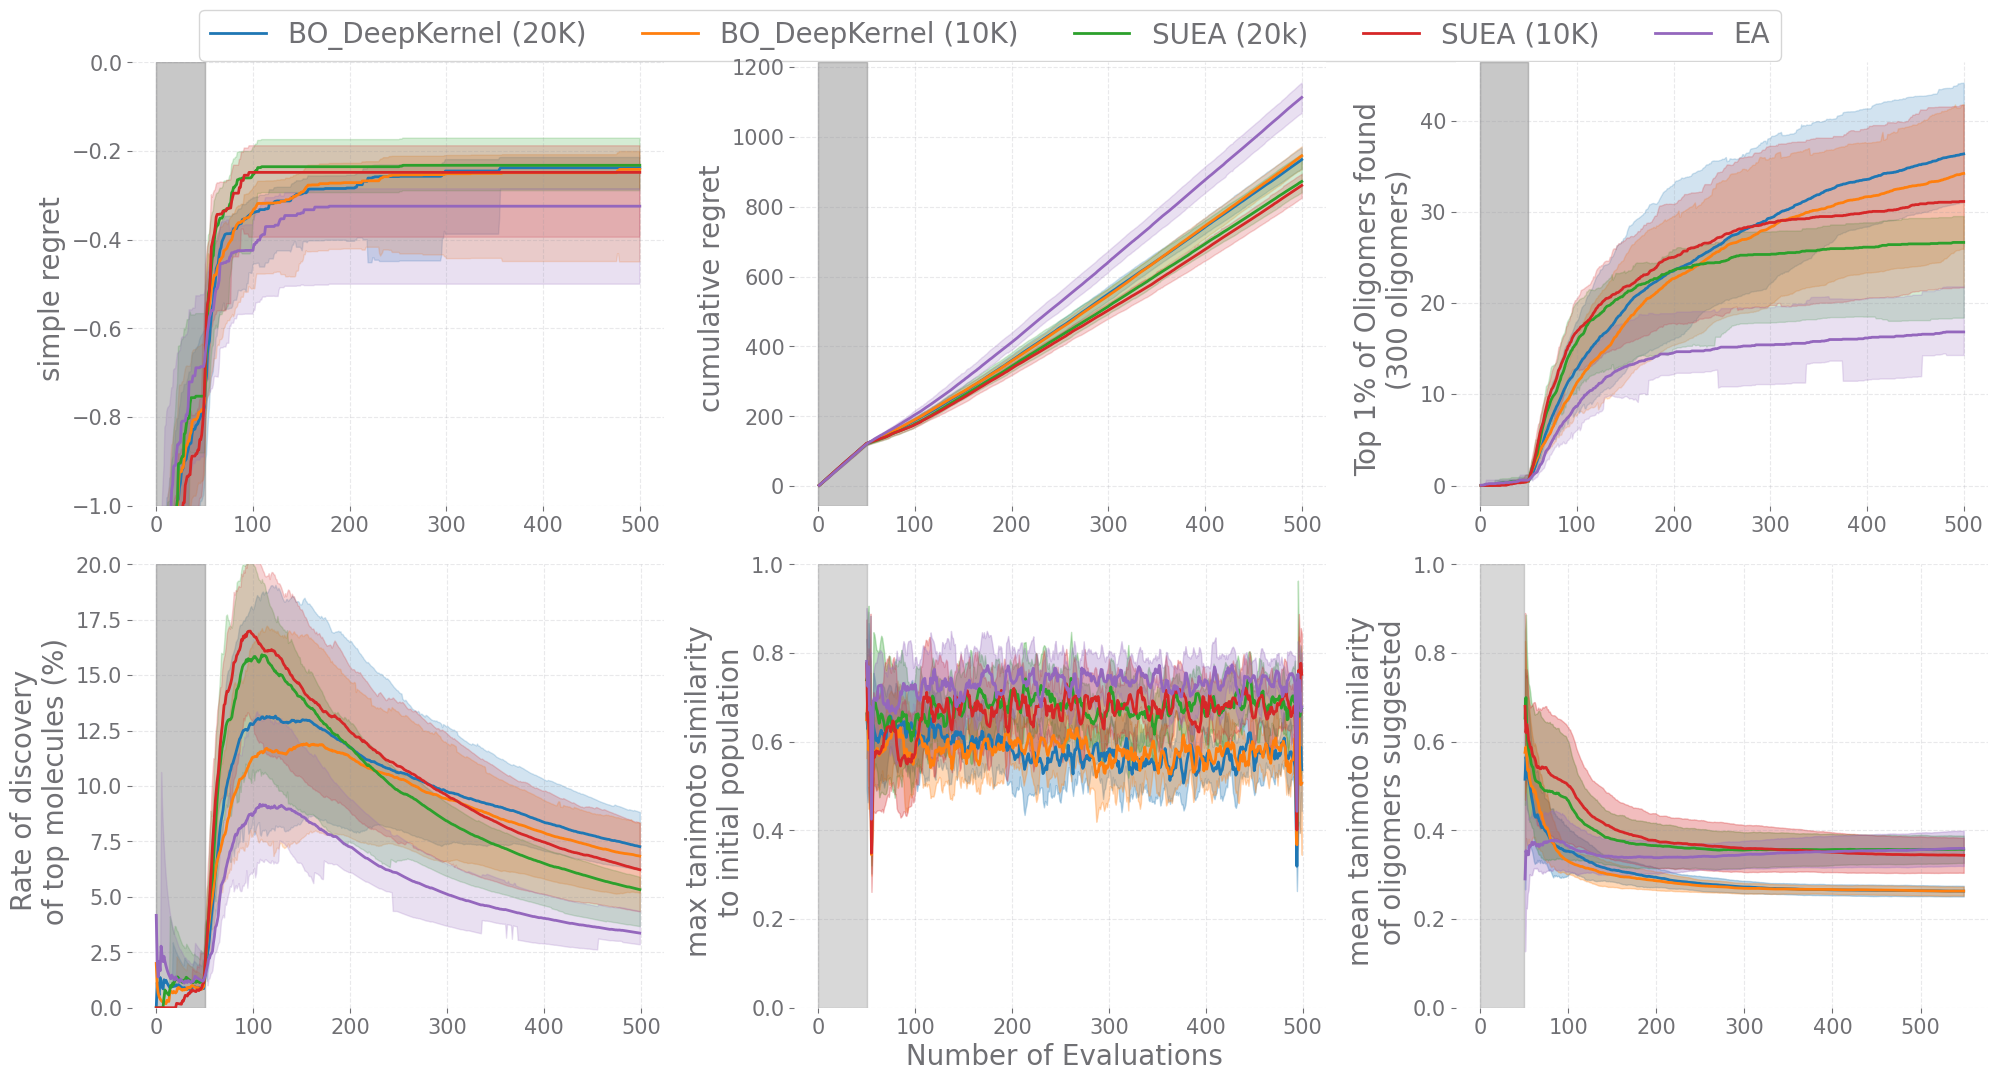

In [14]:
importlib.reload(plot_results_all.tanimoto_similarity_utils)
df_mol_dict = plot_results_all.load_mol_dict()
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot.iloc[[0,1,7,8,9]]
legend_list = ['BO_DeepKernel (20K)', 'BO_DeepKernel (10K)','SUEA (20k)','SUEA (10K)','EA']#'BO_DK','BO_DK new','SU EA','SU_EA New'


fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_single,results_dict,df_list,nb_iterations=min_num_iteration)
df_mol_dict = plot_results_all.add_similarity_plots(axes,df_plot,df_mol_dict,results_dict, nb_iterations=min_num_iteration,  nb_initialisation=50)
plot_results_all.save_mol_dict(df_mol_dict)
for ax_ in axes:
    ax_.set_xlabel('')

# update the axes geometry information
from matplotlib import gridspec
gs = gridspec.GridSpec(len(fig.axes), 3)
fig.set_size_inches(20, 30)
for i, ax in enumerate(fig.axes):
    ax.set_subplotspec(gs[i])
# set font size
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
# hide legend
axes[0].legend().set_visible(False)
fig.tight_layout()
lg = axes[0].legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=6,fontsize=20)
for i in range(len(legend_list)):
    lg.texts[i].set_text(legend_list[i])

axes[0].set_ylim(-1,0)
axes[3].set_ylim(0,20)
# rename x ticks
axes[4].axvspan(0, 50, alpha=0.3, color="grey")
axes[5].axvspan(0, 50, alpha=0.3, color="grey")
axes[4].set_ylabel("max tanimoto similarity \n to initial population")
axes[4].set_xlabel(' Number of Evaluations', fontsize=20)
axes[2].set_ylabel("Top 1% of Oligomers found \n (300 oligomers)")
fig_name = 'benchmarking_diff_dataset_size'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))


 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
2    BO_learned_new*selected*UCB*/rds/general/user/...
3    BO_learned_new*selected*max_sigma*/rds/general...
4    BO_learned_new*selected*max_y_hat*/rds/general...
Name: key, dtype: object


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


len of mol_dataset 59952


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


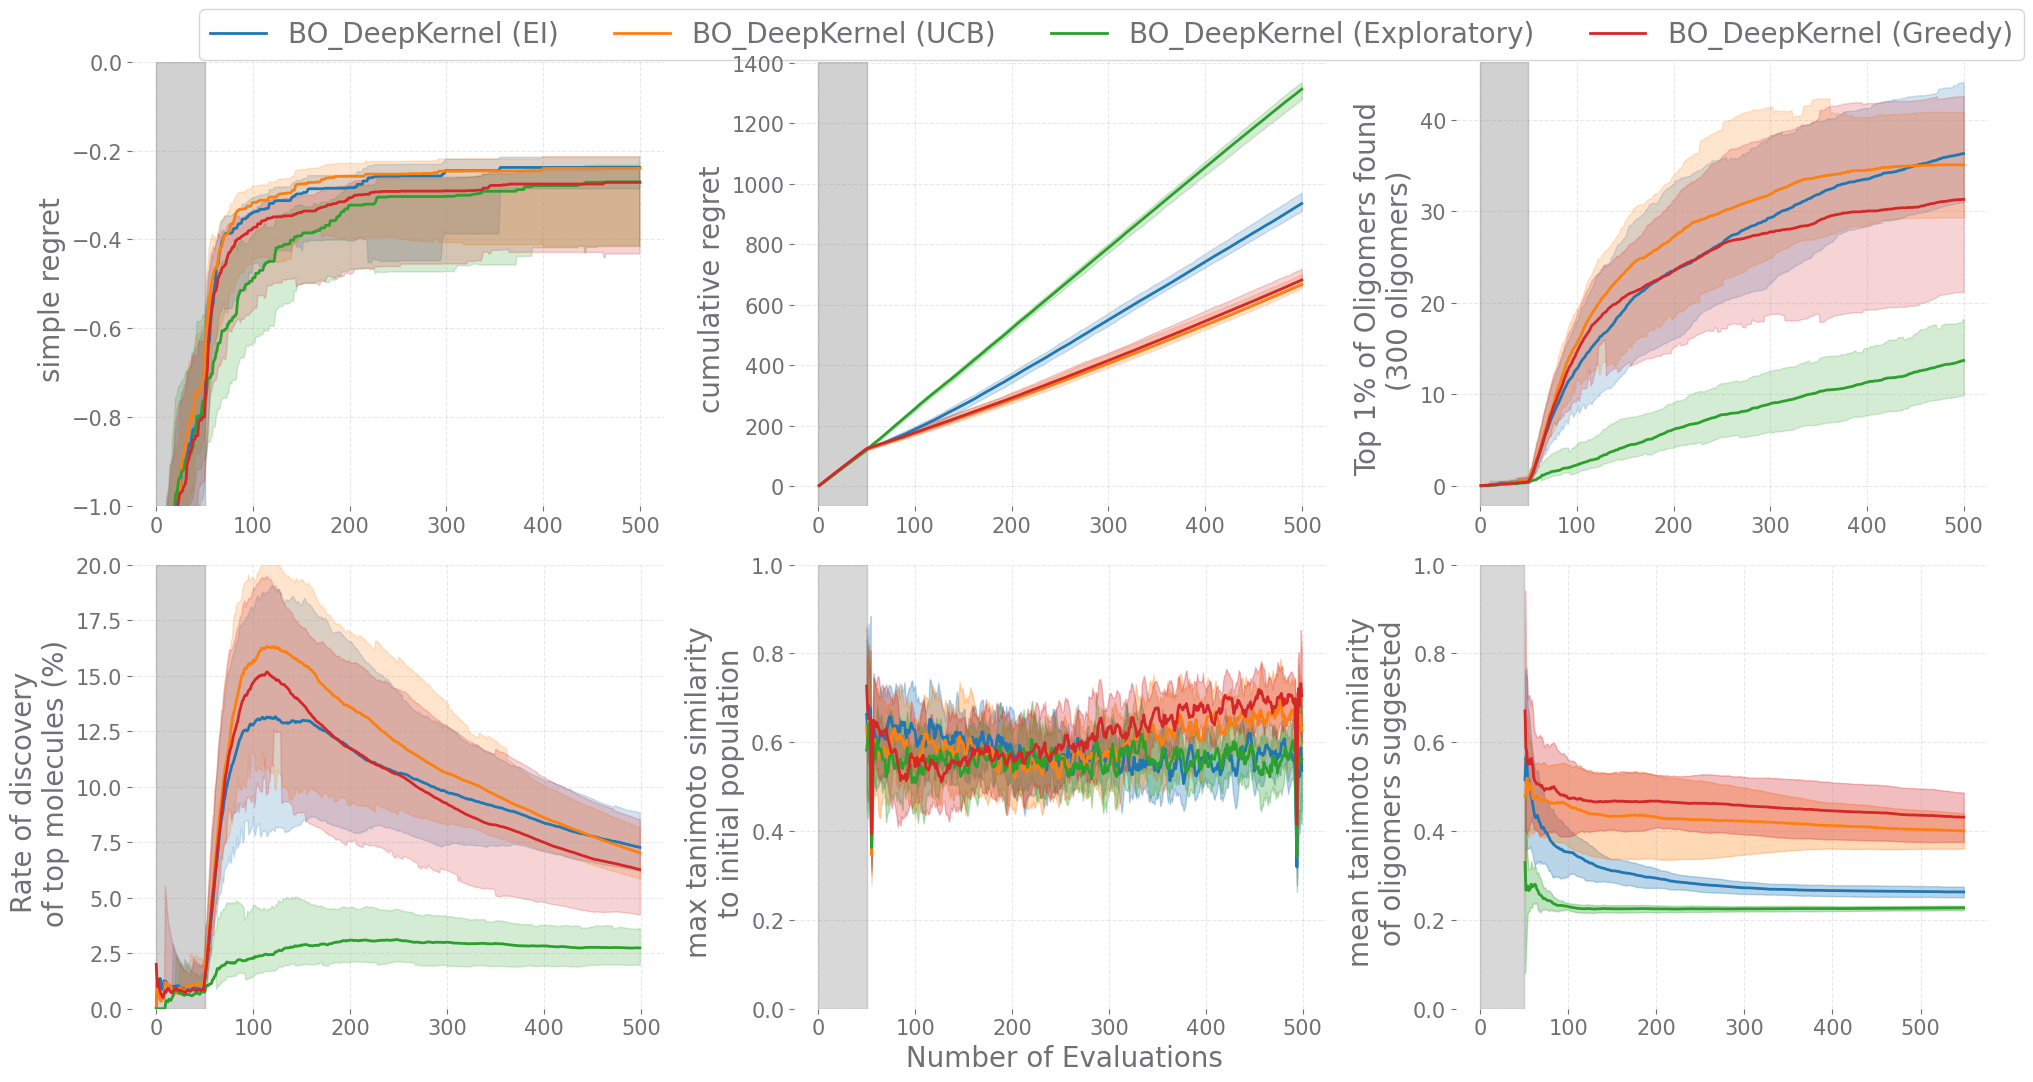

In [15]:
importlib.reload(plot_results_all.tanimoto_similarity_utils)
df_mol_dict = plot_results_all.load_mol_dict()
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot.iloc[[0,2,3,4]]
legend_list = ['BO_DeepKernel (EI)', 'BO_DeepKernel (UCB)','BO_DeepKernel (Exploratory)','BO_DeepKernel (Greedy)']#'BO_DK','BO_DK new','SU EA','SU_EA New'


fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_single,results_dict,df_list,nb_iterations=min_num_iteration)
df_mol_dict = plot_results_all.add_similarity_plots(axes,df_plot,df_mol_dict,results_dict, nb_iterations=min_num_iteration,  nb_initialisation=50)
plot_results_all.save_mol_dict(df_mol_dict)
for ax_ in axes:
    ax_.set_xlabel('')

# update the axes geometry information
from matplotlib import gridspec
gs = gridspec.GridSpec(len(fig.axes), 3)
fig.set_size_inches(20, 30)
for i, ax in enumerate(fig.axes):
    ax.set_subplotspec(gs[i])
# set font size
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
# hide legend
axes[0].legend().set_visible(False)
fig.tight_layout()
lg = axes[0].legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=6,fontsize=20)
for i in range(len(legend_list)):
    lg.texts[i].set_text(legend_list[i])

axes[0].set_ylim(-1,0)
axes[3].set_ylim(0,20)
# rename x ticks
axes[4].axvspan(0, 50, alpha=0.3, color="grey")
axes[5].axvspan(0, 50, alpha=0.3, color="grey")
axes[4].set_ylabel("max tanimoto similarity \n to initial population")
axes[4].set_xlabel(' Number of Evaluations', fontsize=20)
axes[2].set_ylabel("Top 1% of Oligomers found \n (300 oligomers)")
fig_name = 'benchmarking_diff_acquisition function'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))


 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
1    BO_precursor*all*EI**data/output/Full_dataset/...
2    BO_precursor*selected*EI**data/output/Full_dat...
3    ea_surrogate_new*selected*EI*/rds/general/user...
4    evolution_algorithm*selected*EI**data/output/F...
5    random*selected*EI**data/output/Full_dataset/3...
Name: key, dtype: object


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


len of mol_dataset 58853


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


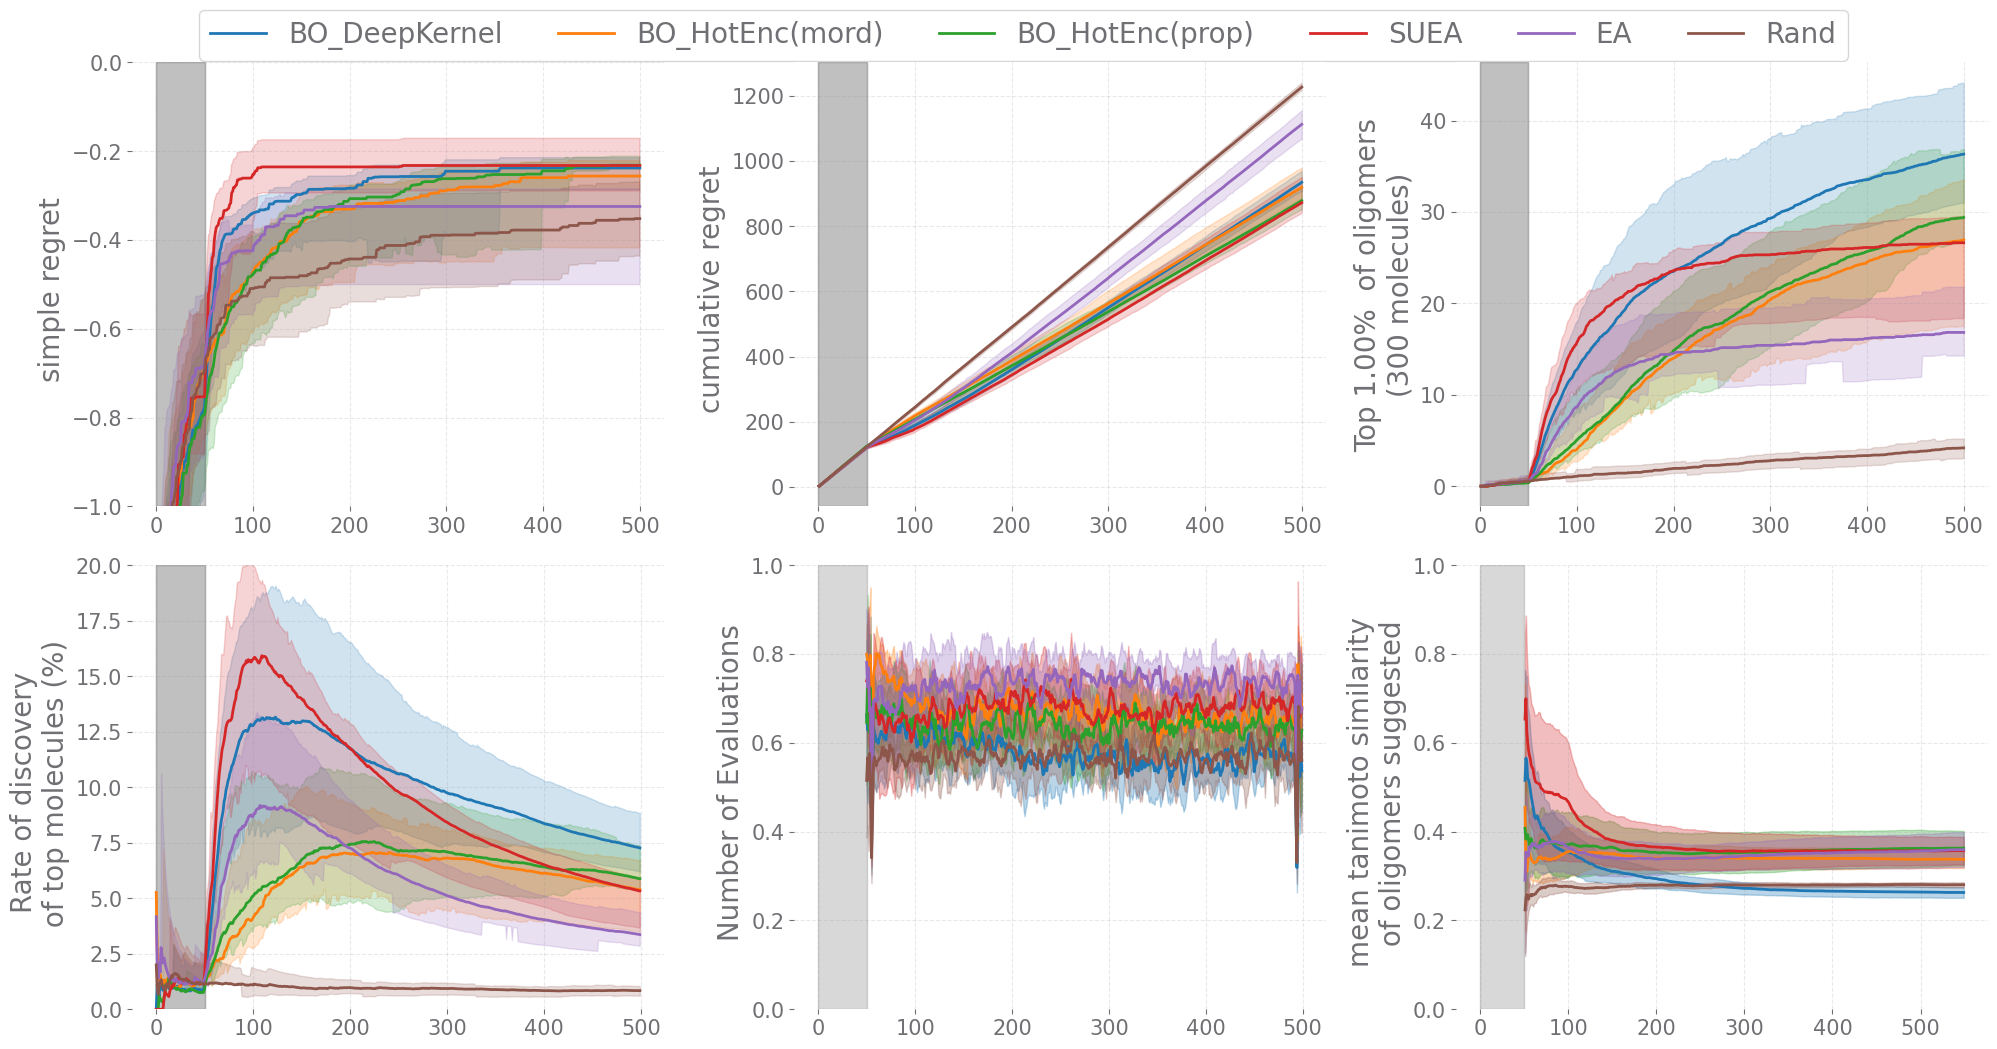

In [20]:
importlib.reload(plot_results_all.tanimoto_similarity_utils)
df_mol_dict = plot_results_all.load_mol_dict()
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot#.iloc[[0,1,2,3,4,5,6]]
legend_list = ['BO_DeepKernel', 'BO_HotEnc(mord)','BO_HotEnc(prop)','SUEA','EA','Rand']#'BO_DK','BO_DK new','SU EA','SU_EA New'


fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_single,results_dict,df_list,nb_iterations=min_num_iteration)
df_mol_dict = plot_results_all.add_similarity_plots(axes,df_plot,df_mol_dict,results_dict, nb_iterations=min_num_iteration,  nb_initialisation=50)
plot_results_all.save_mol_dict(df_mol_dict)
for ax_ in axes:
    ax_.set_xlabel('')

# update the axes geometry information
from matplotlib import gridspec
gs = gridspec.GridSpec(len(fig.axes), 3)
fig.set_size_inches(20, 30)
for i, ax in enumerate(fig.axes):
    ax.set_subplotspec(gs[i])
# set font size
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
# hide legend
axes[0].legend().set_visible(False)
fig.tight_layout()
lg = axes[0].legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=6,fontsize=20)
for i in range(len(legend_list)):
    lg.texts[i].set_text(legend_list[i])

axes[0].set_ylim(-1,0)
axes[3].set_ylim(0,20)
# rename x ticks
axes[4].axvspan(0, 50, alpha=0.3, color="grey")
axes[5].axvspan(0, 50, alpha=0.3, color="grey")
axes[4].set_ylabel("max tanimoto similarity \n to initial population")
axes[4].set_xlabel(' Number of Evaluations', fontsize=20)
axes[2].set_ylabel("Top 1% of Oligomers found \n (300 oligomers)")
fig_name = 'benchmarking_all_search_alg'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))


 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
1    BO_precursor*all*EI**data/output/Full_dataset/...
2    BO_precursor*selected*EI**data/output/Full_dat...
3    ea_surrogate_new*selected*EI*/rds/general/user...
4    evolution_algorithm*selected*EI**data/output/F...
5    random*selected*EI**data/output/Full_dataset/3...
Name: key, dtype: object
min_target is  -0.3176077110680689
min_target is  -0.3176077110680689
min_target is  -0.3176077110680689
min_target is  -0.3176077110680689
min_target is  -0.3176077110680689
min_target is  -0.3176077110680689


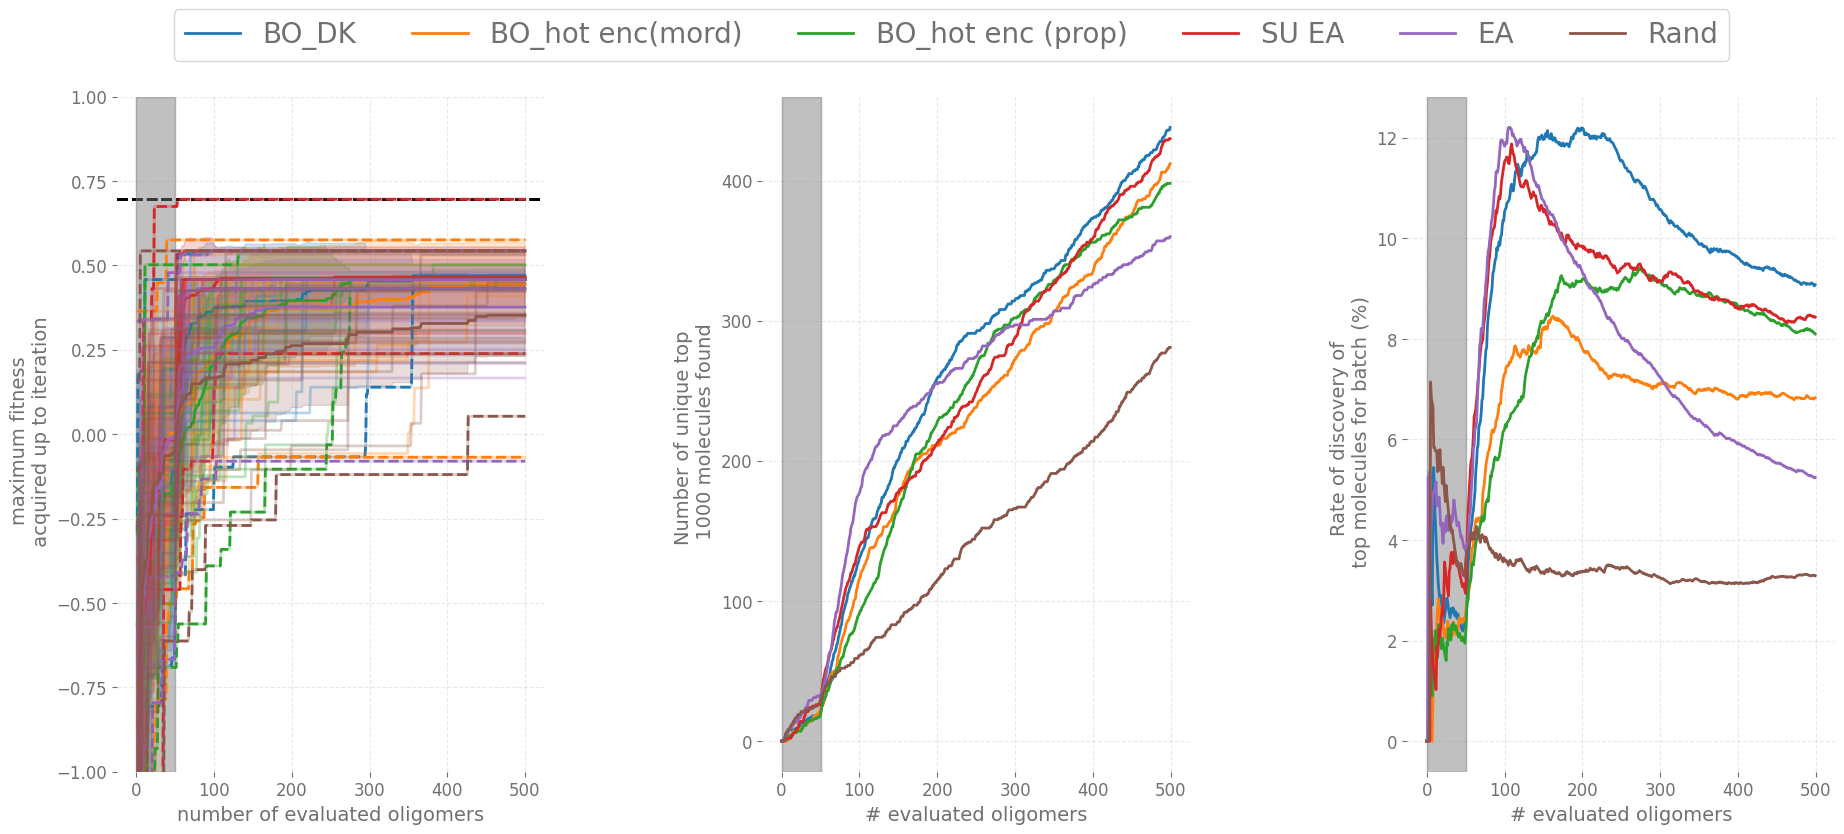

In [153]:
importlib.reload(plot_results_all)
df_mol_dict = plot_results_all.load_mol_dict()
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot#.iloc[[0,1,2,3,4,5,6]]
legend_list = ['BO_DK','BO_hot enc(mord)','BO_hot enc (prop)','SU EA','EA','Rand']


fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_multi,results_dict,df_list,nb_iterations=min_num_iteration,num_results_min=20)
axes[0].legend().set_visible(False)
fig.tight_layout()

axes[0].set_ylim(-1,1)
# delete axes in the second row
for _ax  in axes[3:]:
    _ax.set_visible(False)
from matplotlib import gridspec
gs = gridspec.GridSpec(len(fig.axes), 3)
fig.set_size_inches(20, 15)
lg = axes[0].legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=6,fontsize=20)
for i in range(len(legend_list)):
    lg.texts[i].set_text(legend_list[i])

 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
1    BO_precursor*all*EI**data/output/Full_dataset/...
2    BO_precursor*selected*EI**data/output/Full_dat...
3    ea_surrogate_new*selected*EI*/rds/general/user...
4    evolution_algorithm*selected*EI**data/output/F...
5    random*selected*EI**data/output/Full_dataset/3...
Name: key, dtype: object
 number of new calculations 4037  number of new oligomers in top  117  for key  BO_learned_new*selected*EI*/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516//SchNet/splitrand-nummol20000/*data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/precursor_data_200324.pkl
 number of new calculations 5389  number of new oligomers in top  98  for key  BO_precursor*all*EI**data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/df_PCA_mordred_descriptor_290224.pkl
 number of new calculations 4079  number of new oligomers in top  100  for ke

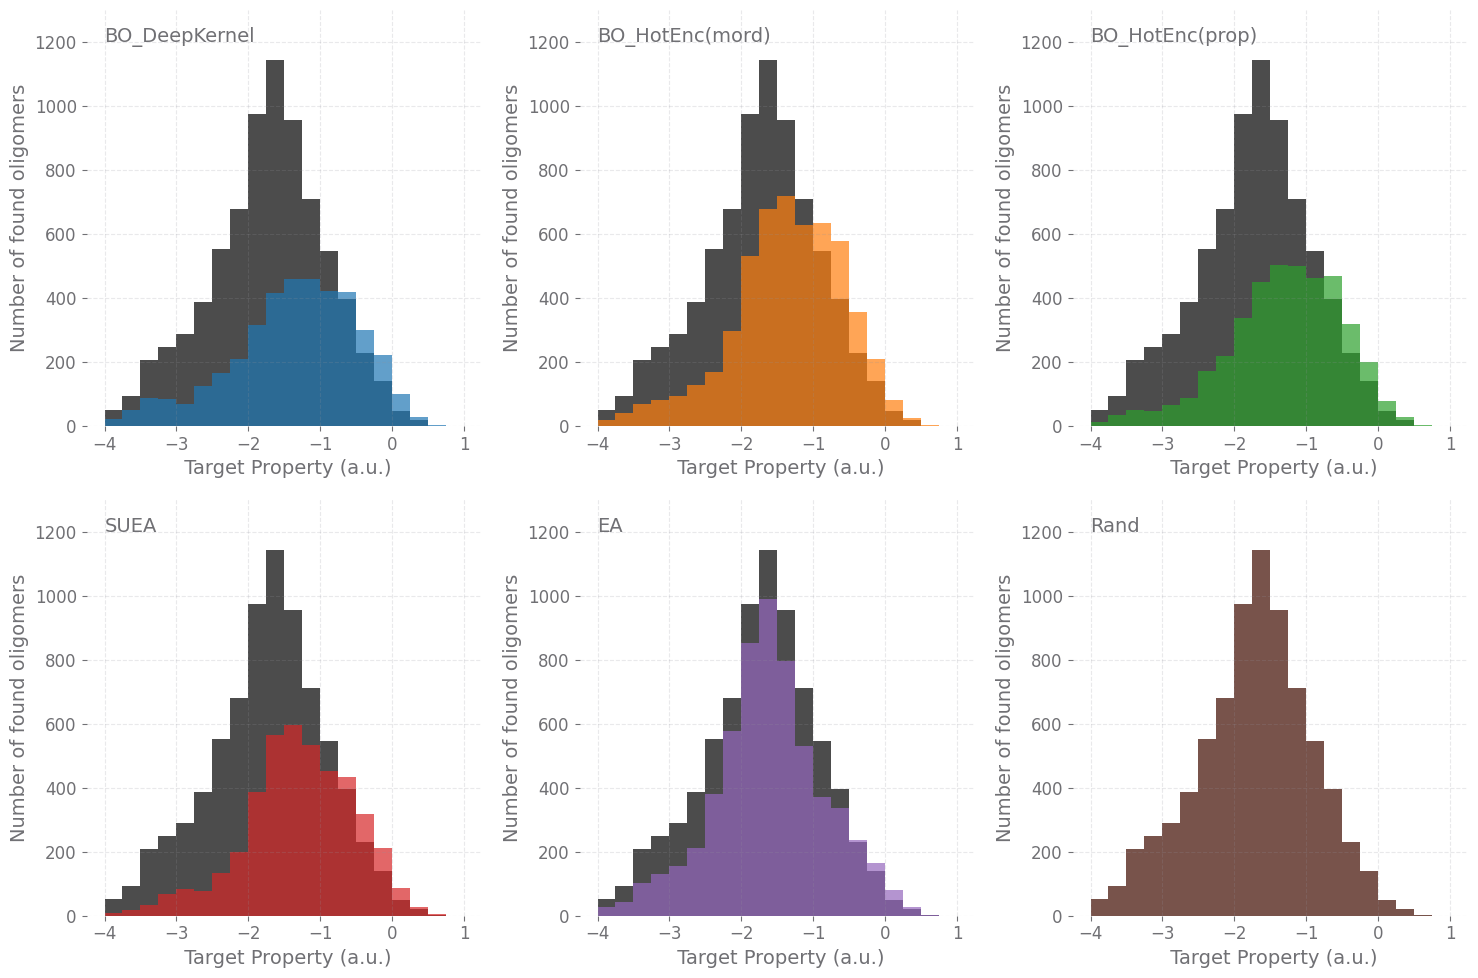

In [33]:
#df_mol_dict = plot_results_all.load_mol_dict()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_plot = df_summary_1.copy()
#df_plot = df_plot.iloc[[0,2,3,4,6,7]]
#legend_list = ['BO_DK','BO_hot enc(mord)','BO_hot enc (prop)','SU EA','EA','Rand']
df_plot = df_plot.iloc[[0,1,2,3,4,5]]
legend_list = ['BO_DeepKernel', 'BO_HotEnc(mord)','BO_HotEnc(prop)','SUEA','EA','Rand']#'BO_DK','BO_DK new','SU EA','SU_EA New'
fig,ax = plt.subplots(2,3,figsize=(15,10))

ax= ax.flatten()
color_list = sns.color_palette("tab10", len(df_plot))
df_plot["color"] = color_list
df_max_found_dict = {}
#df_results_dict = {}
keys = df_plot["key"]
print(" keys :", keys)
min_target = df_Benchmark[target].iloc[int(df_Benchmark.shape[0]*0.01)]
range_res = (-4,1)


for i,key in enumerate(keys.values):
    res = results_dict[key]
    color = df_plot[df_plot["key"] == key]["color"].iloc[0]


    metric_dict = {}


    df_results, df_max_found = Search_results_plot.get_df_max_target_found(
        res[:20],
        max_iteration=500,
        df_total=df_Benchmark,
        num_initialisation=50,
        target_name=target,

        min_target=min_target,
    )

    #df_max_found = df_max_found[~df_max_found['InChIKey'].isin(df_total_old['InChIKey'])]
    #df_Benchmark.hist(target,bins=20,ax=ax[i],color='black',alpha=0.5,range=range_res)
    
    df_results_dict[rand_key] .hist(target,bins=20,ax=ax[i],label=key,color='black',alpha=0.7,range=range_res)

    df_results.hist(target,bins=20,ax=ax[i],label=key,color=color,alpha=0.7,range=range_res)

    #d#f_max_found.hist(target_name,bins=50,ax=ax[1],label=key,color=color,alpha=0.7,range=range_max,density=False)
    df_max_found_dict[key] = df_max_found
    df_results_dict[key] = df_results
    print(' number of new calculations',df_results.shape[0],' number of new oligomers in top ',df_max_found.shape[0],' for key ',key)
    #print('rate of discovery', df_max_found.shape[0]/df_results.shape[0])
    rand_key = 'random*selected*EI**data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/precursor_data_200324.pkl'
    ax[i].set_ylabel("Number of found oligomers")
    ax[i].set_xlabel(' Target Property (a.u.)')

    ax[i].set_title('')
    ax[i].set_ylim(0,1300)
    #ax[i].set_xlim(0.4,1)

fig.tight_layout()
for i in range(len(legend_list)):
    ax[i].text(-4,1200,legend_list[i])

fig_name = 'hist_toatl_benchmark'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))

 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
1    BO_precursor*all*EI**data/output/Full_dataset/...
2    BO_precursor*selected*EI**data/output/Full_dat...
3    ea_surrogate_new*selected*EI*/rds/general/user...
4    evolution_algorithm*selected*EI**data/output/F...
5    random*selected*EI**data/output/Full_dataset/3...
Name: key, dtype: object
 number of new calculations 4037  number of new oligomers in top  117  for key  BO_learned_new*selected*EI*/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516//SchNet/splitrand-nummol20000/*data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/precursor_data_200324.pkl
 number of new calculations 5389  number of new oligomers in top  98  for key  BO_precursor*all*EI**data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/df_PCA_mordred_descriptor_290224.pkl
 number of new calculations 4079  number of new oligomers in top  100  for ke

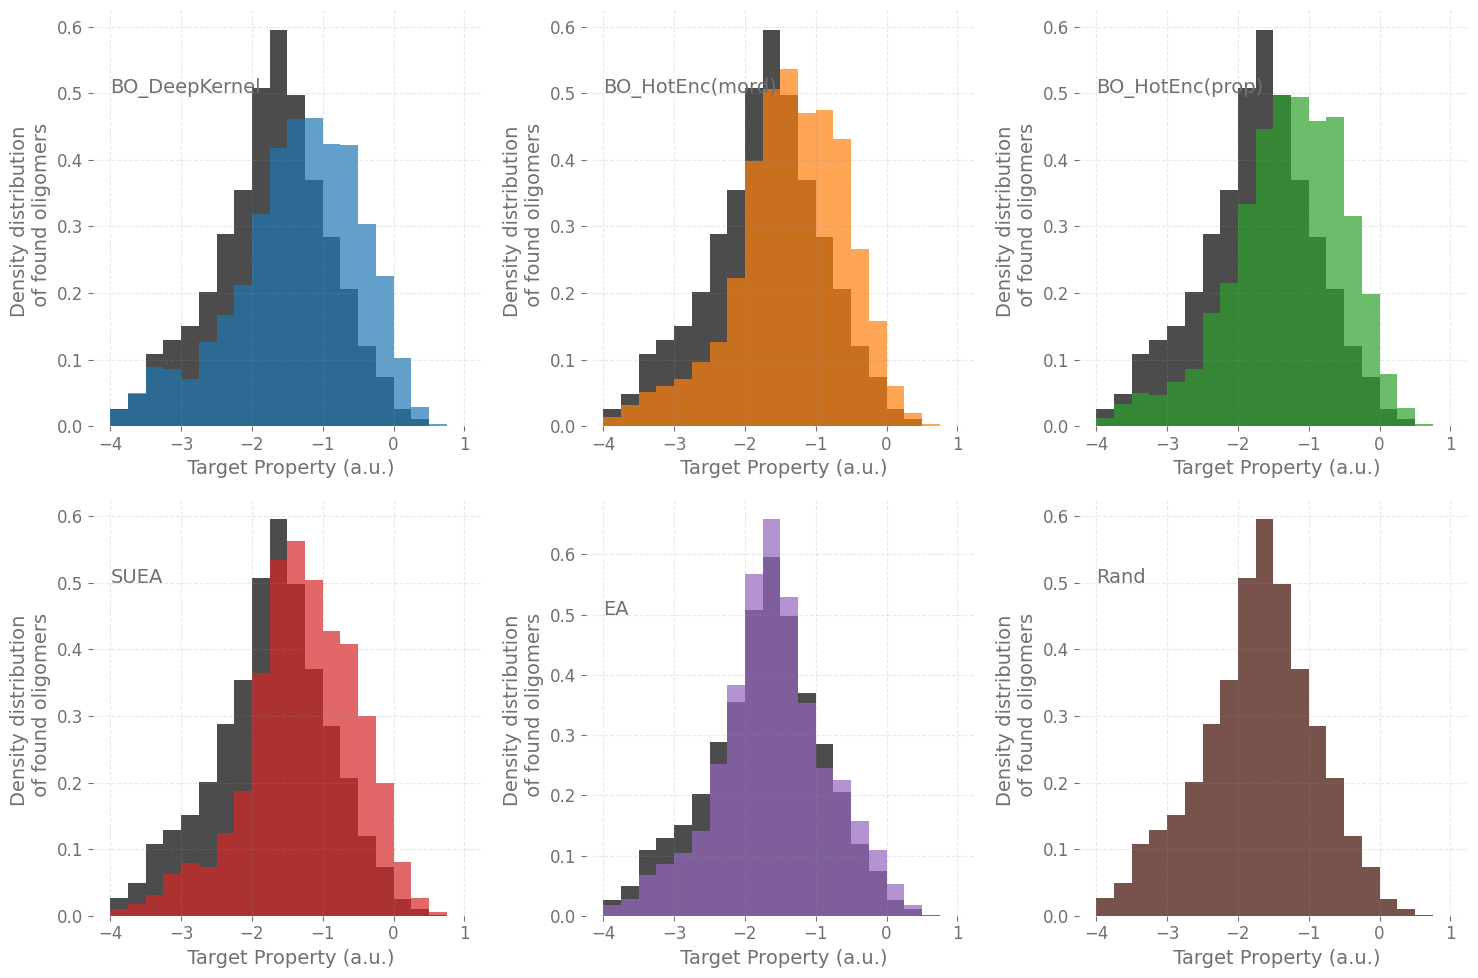

In [35]:
#df_mol_dict = plot_results_all.load_mol_dict()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_plot = df_summary_1.copy()
#df_plot = df_plot.iloc[[0,2,3,4,6,7]]
#legend_list = ['BO_DK','BO_hot enc(mord)','BO_hot enc (prop)','SU EA','EA','Rand']
df_plot = df_plot.iloc[[0,1,2,3,4,5]]
legend_list = ['BO_DeepKernel', 'BO_HotEnc(mord)','BO_HotEnc(prop)','SUEA','EA','Rand']#'BO_DK','BO_DK new','SU EA','SU_EA New'
fig,ax = plt.subplots(2,3,figsize=(15,10))

ax= ax.flatten()
color_list = sns.color_palette("tab10", len(df_plot))
df_plot["color"] = color_list
df_max_found_dict = {}
#df_results_dict = {}
keys = df_plot["key"]
print(" keys :", keys)
min_target = df_Benchmark[target].iloc[int(df_Benchmark.shape[0]*0.01)]
range_res = (-4,1)


for i,key in enumerate(keys.values):
    res = results_dict[key]
    color = df_plot[df_plot["key"] == key]["color"].iloc[0]


    metric_dict = {}


    df_results, df_max_found = Search_results_plot.get_df_max_target_found(
        res[:20],
        max_iteration=500,
        df_total=df_Benchmark,
        num_initialisation=50,
        target_name=target,

        min_target=min_target,
    )

    #df_max_found = df_max_found[~df_max_found['InChIKey'].isin(df_total_old['InChIKey'])]
    #df_Benchmark.hist(target,bins=20,ax=ax[i],color='black',alpha=0.5,range=range_res)
    
    df_results_dict[rand_key] .hist(target,bins=20,ax=ax[i],label=key,color='black',alpha=0.7,range=range_res,density=True)

    df_results.hist(target,bins=20,ax=ax[i],label=key,color=color,alpha=0.7,range=range_res,density=True)

    #d#f_max_found.hist(target_name,bins=50,ax=ax[1],label=key,color=color,alpha=0.7,range=range_max,density=False)
    df_max_found_dict[key] = df_max_found
    df_results_dict[key] = df_results
    print(' number of new calculations',df_results.shape[0],' number of new oligomers in top ',df_max_found.shape[0],' for key ',key)
    #print('rate of discovery', df_max_found.shape[0]/df_results.shape[0])
    rand_key = 'random*selected*EI**data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/precursor_data_200324.pkl'
    ax[i].set_ylabel("Density distribution \n of found oligomers")
    ax[i].set_xlabel(' Target Property (a.u.)')

    ax[i].set_title('')
    #ax[i].set_ylim(0,1300)
    #ax[i].set_xlim(0.4,1)

fig.tight_layout()
for i in range(len(legend_list)):
    ax[i].text(-4,0.5,legend_list[i])

fig_name = 'hist_toatl_benchmark'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))